<a href="https://colab.research.google.com/github/gurram46/Support-Vector-machine/blob/main/Support_Vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('mushroom.csv')

In [ ]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,bulbous,silky,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,rhizomorphs,fibrous,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,missing,smooth,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,rooted,scaly,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


# Data Exploring

In [ ]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [ ]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


# Exploratory Data Analysis (EDA)

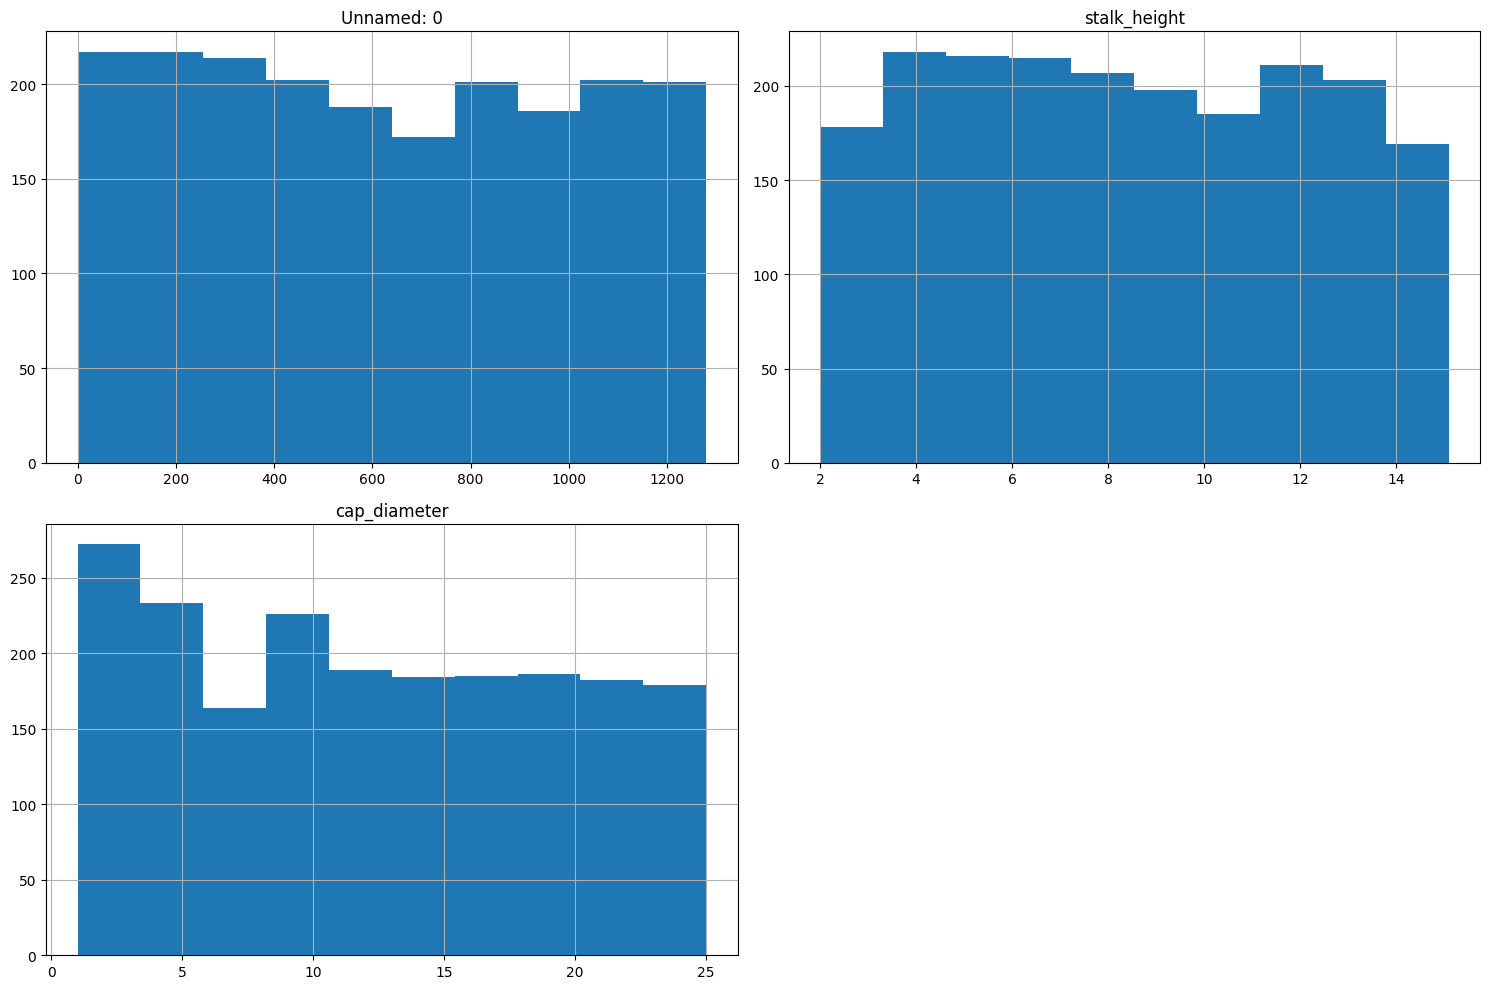

In [ ]:
data.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


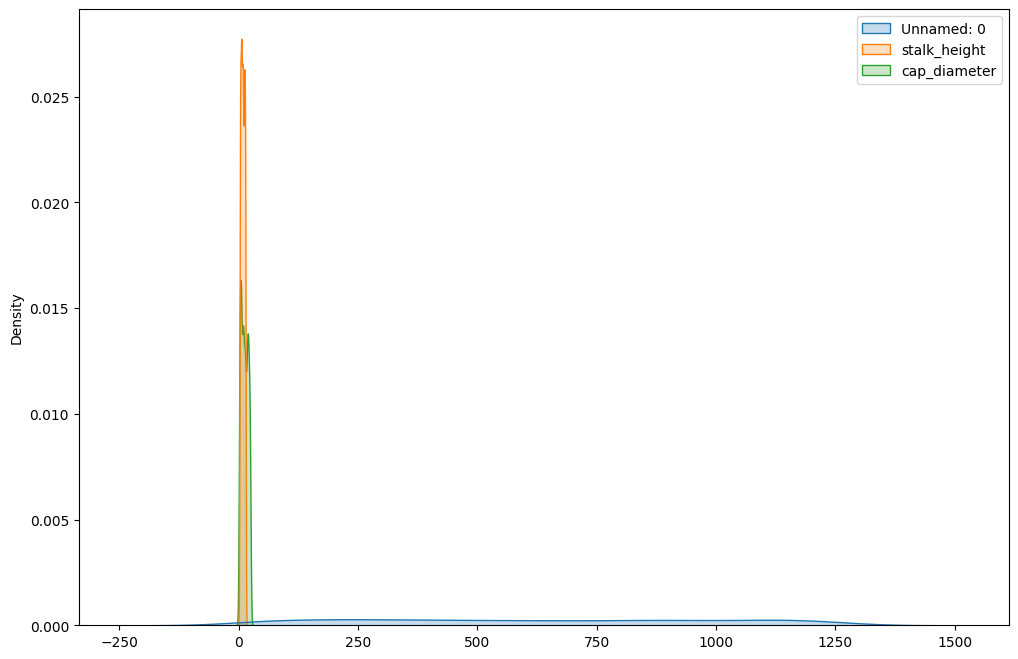

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, shade=True)
plt.show()


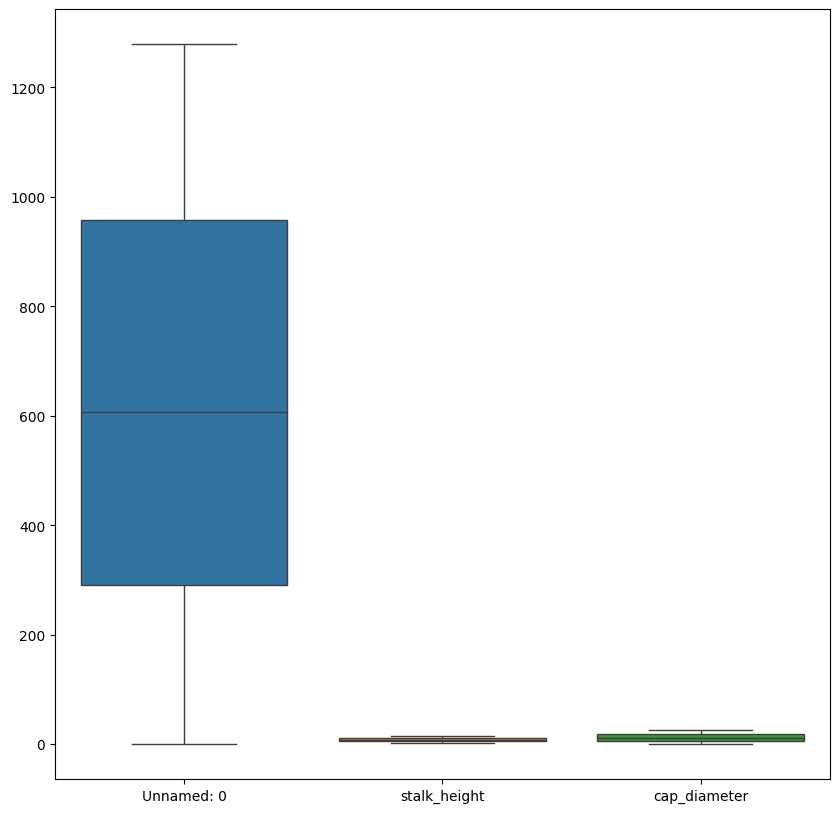

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)
plt.show()

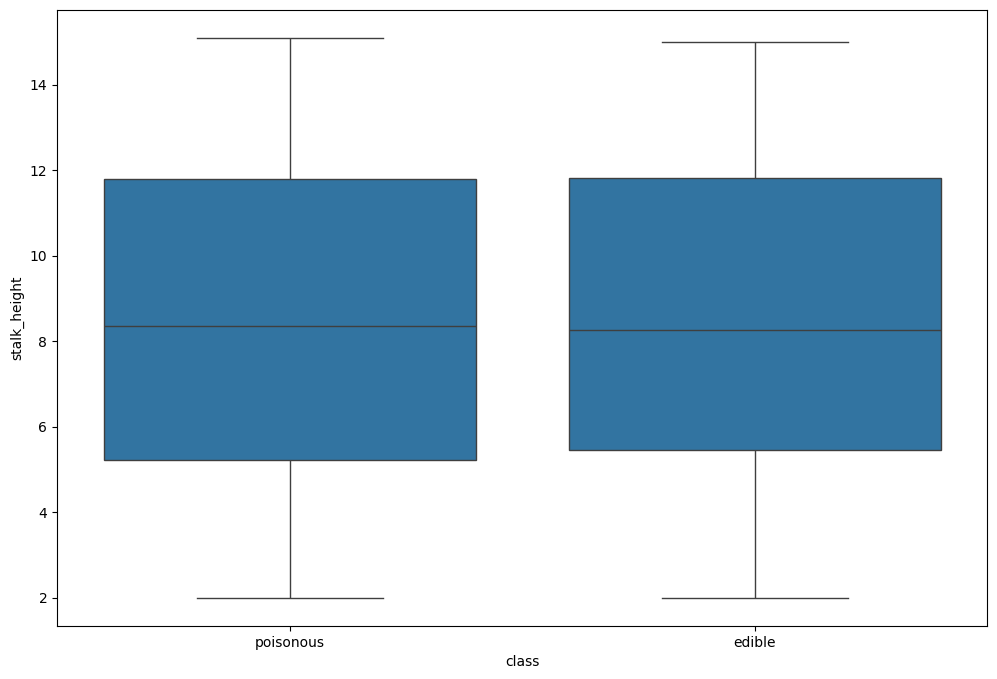

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='class', y='stalk_height', data=data)
plt.show()


# Data Preprocessing

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

data_encoded = pd.get_dummies(data, drop_first=True)

data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 105 entries, stalk_height to class_poisonous
dtypes: bool(103), float64(2)
memory usage: 232.5 KB


In [ ]:
corr_matrix = data_encoded.corr()
corr_matrix

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_yes,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_descending,gill_attachment_free,gill_attachment_notched,gill_spacing_crowded,gill_spacing_distant,gill_size_narrow,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,stalk_shape_tapering,stalk_root_club,stalk_root_cup,stalk_root_equal,stalk_root_missing,stalk_root_rhizomorphs,stalk_root_rooted,...,stalk_surface_below_ring_smooth,stalk_color_above_ring_buff,stalk_color_above_ring_cinnamon,stalk_color_above_ring_gray,stalk_color_above_ring_orange,stalk_color_above_ring_pink,stalk_color_above_ring_red,stalk_color_above_ring_white,stalk_color_above_ring_yellow,stalk_color_below_ring_buff,stalk_color_below_ring_cinnamon,stalk_color_below_ring_gray,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_type_universal,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_one,ring_number_two,ring_type_evanescent,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,ring_type_sheathing,ring_type_zone,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
stalk_height,1.000000,-0.003486,-0.012581,-0.000789,-0.016173,0.036380,-0.020405,0.042192,0.014377,0.041380,-0.010368,-0.015397,0.025509,0.021314,0.027141,-0.006006,0.009293,0.064644,0.028390,-0.023129,-0.085459,0.064240,-0.049283,0.046278,0.012423,0.000022,-0.027611,0.049206,-0.039030,0.051814,-0.011520,-0.003273,-0.018361,-0.027243,-0.013482,0.049146,0.050433,-0.030969,0.003160,0.014130,0.014351,-0.035533,0.025580,0.036862,-0.044368,0.006439,-0.015839,0.004114,0.005172,0.040242,...,0.005742,0.043494,0.023280,0.011539,0.026517,-0.027801,-0.013224,0.018336,-0.020268,0.013100,-0.014941,0.008709,-0.006142,0.029771,0.042443,-0.049505,0.014088,-0.055314,0.009496,-0.035362,0.023686,-0.020559,-0.013619,-0.012161,-0.003960,0.066180,-0.021347,0.002143,0.006986,-0.025868,-0.053558,-0.016426,-0.005165,0.004682,0.004786,-0.042488,-0.018797,0.044459,0.004634,0.050603,-0.009769,0.006577,-0.012438,0.030627,-0.011691,0.026259,-0.016840,-0.014310,0.043681,-0.013655
cap_diameter,-0.003486,1.000000,-0.041450,-0.037111,0.076408,0.004677,0.021816,0.032266,-0.014968,-0.000157,0.061628,-0.024445,0.012728,-0.018284,-0.038276,0.015841,0.012648,-0.046946,0.031444,0.010636,0.025630,0.025998,-0.002601,-0.026319,-0.059243,-0.012182,-0.020372,-0.005569,-0.023451,0.021669,0.014475,-0.068743,0.017140,0.030611,0.029168,-0.004430,-0.004381,-0.030285,0.003646,0.030188,0.014377,-0.000009,-0.024579,-0.004822,-0.045574,-0.049133,0.045711,0.007616,0.027709,-0.007422,...,0.056862,0.020544,0.034612,-0.046120,-0.028039,0.028302,-0.024330,0.031817,0.032156,-0.036997,-0.038835,0.008979,-0.030642,0.074627,-0.005224,0.057708,-0.052388,-0.058645,-0.016791,0.023673,-0.029037,-0.001986,0.000952,0.034284,0.076497,0.028889,-0.035700,-0.009426,0.005724,-0.022248,-0.016117,0.046031,-0.033632,0.030485,0.013299,0.020799,0.021657,-0.049354,0.077197,-0.020013,0.027782,-0.012168,-0.099478,-0.051316,-0.014271,0.035248,-0.005320,-0.009863,0.039543,-0.019707
cap_shape_conical,-0.012581,-0.041450,1.000000,-0.235330,-0.243312,-0.257259,0.045453,-0.003400,-0.042937,0.0

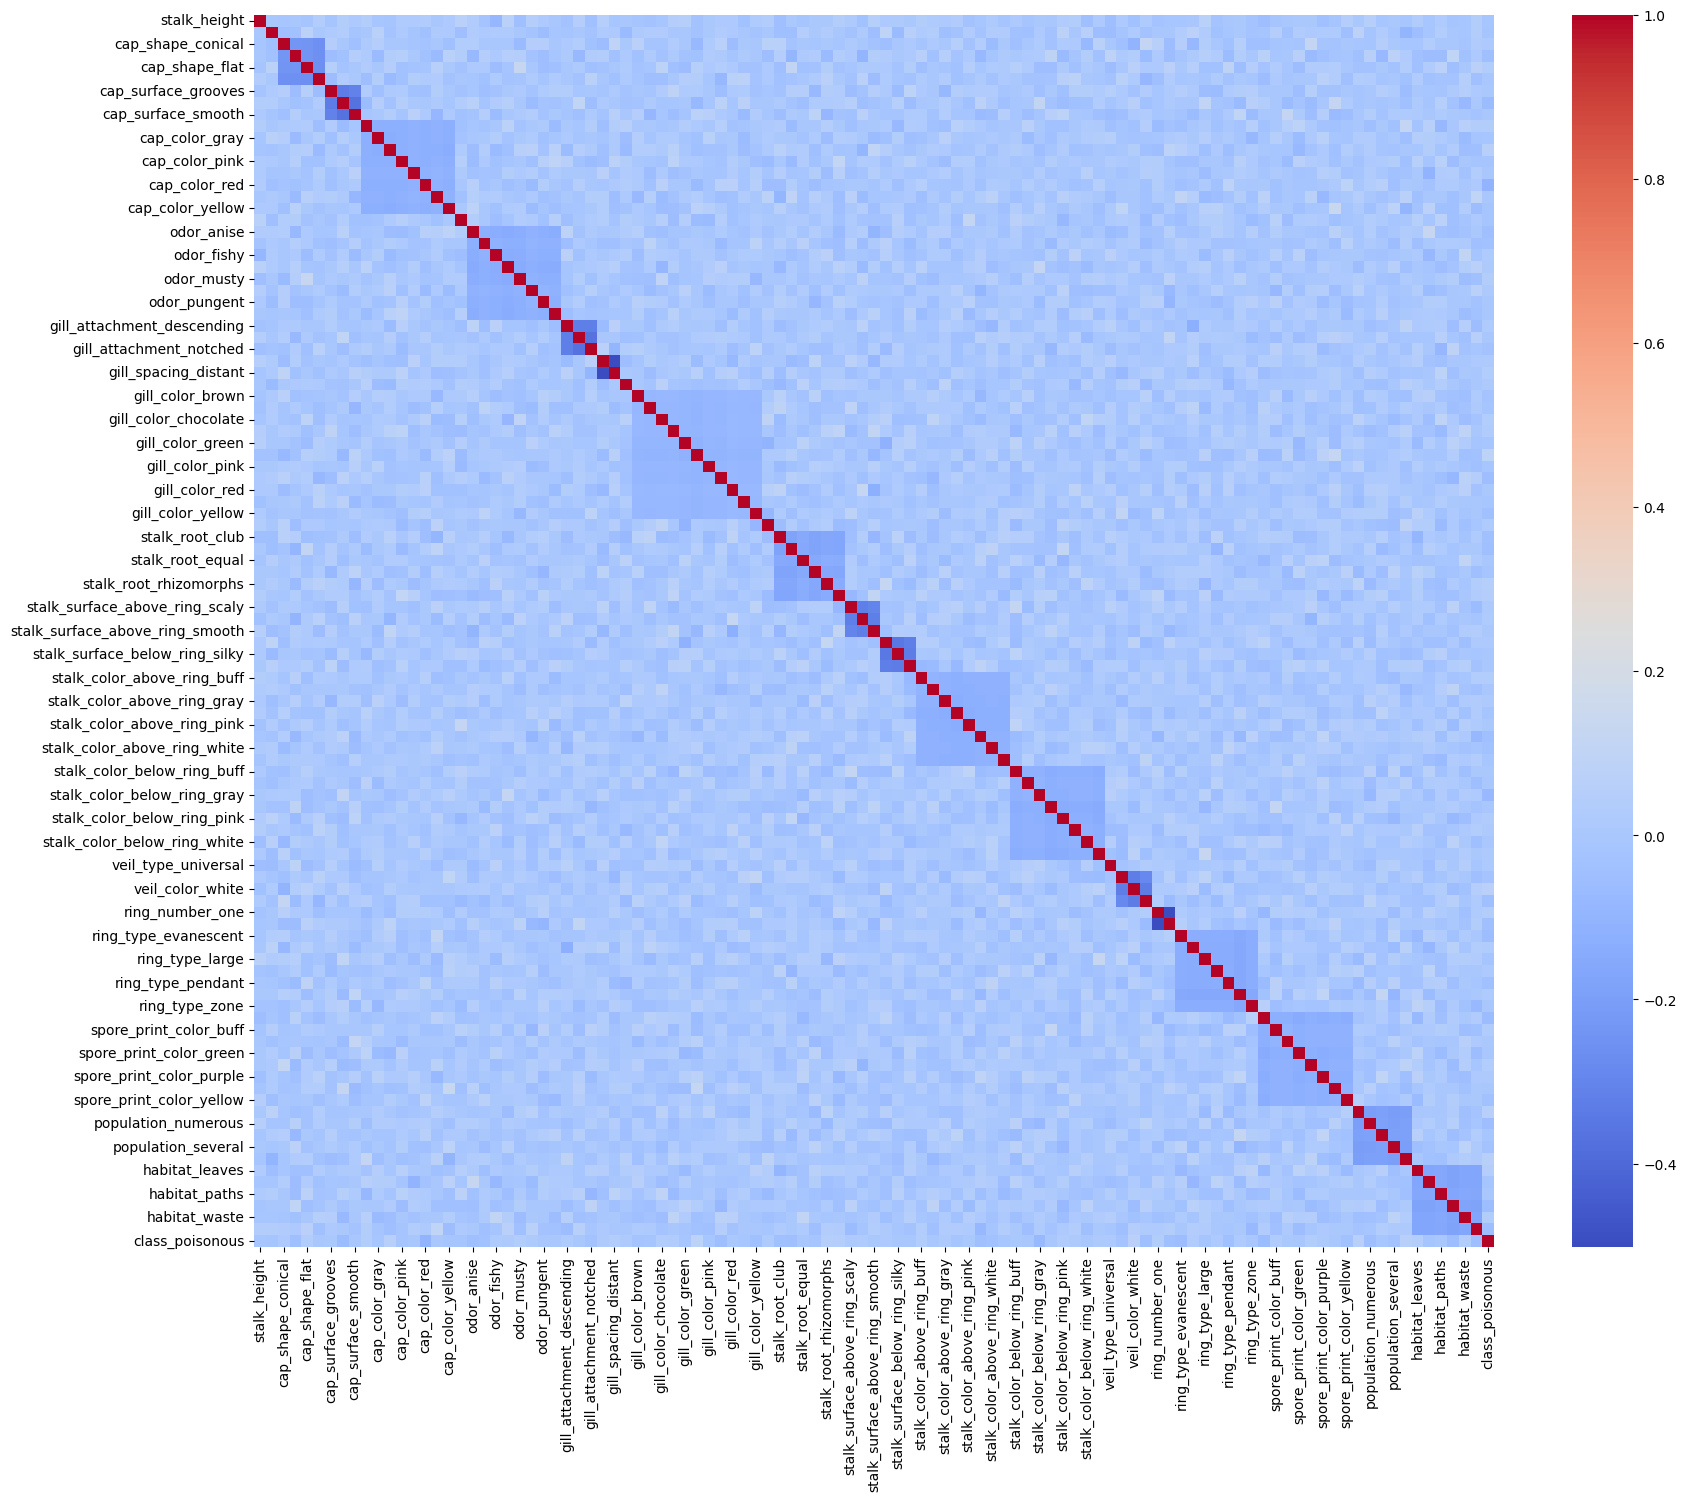

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


# split into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data_encoded.drop('class_poisonous', axis=1)
y=data_encoded['class_poisonous']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

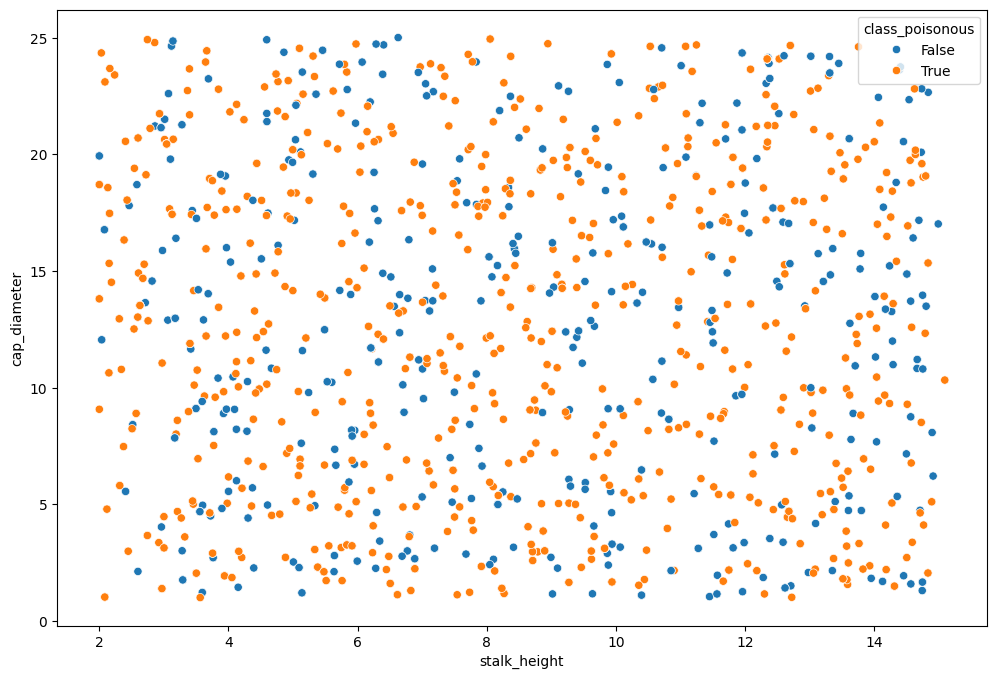

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='stalk_height',y='cap_diameter',hue='class_poisonous',data=data_encoded)
plt.show()

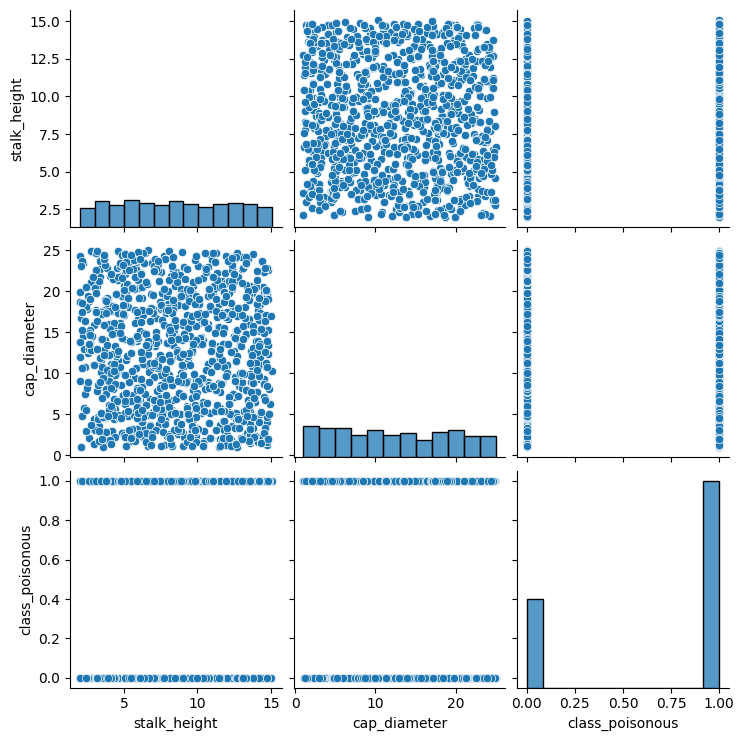

In [ ]:
sns.pairplot(data_encoded[['stalk_height', 'cap_diameter', 'class_poisonous']])
plt.show()


# SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6916666666666667
Precision: 0.6916666666666667
Recall: 1.0
F1 Score: 0.8177339901477833


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       185
        True       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Confusion Matrix:
 [[  0 185]
 [  0 415]]


# Visualization of SVM Results

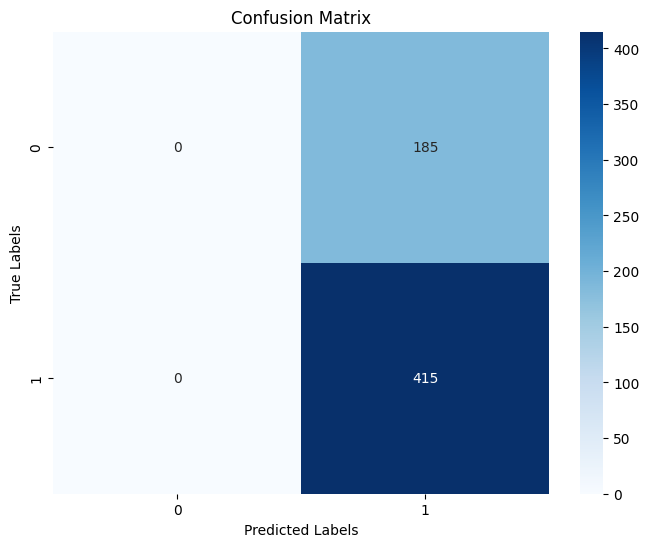

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid_search=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.704 total time=   0.6s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.704 total time=   0.4s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.704 total time=   0.7s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.704 total time=   0.5s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.704 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.704 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.704 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.704 total time=   0.2s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.704 total time=   0.2s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.704 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.704 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8257142857142856


In [ ]:
best_model=grid_search.best_estimator_
y_pred_best=best_model.predict(X_test)

In [ ]:
print("\nBest Model Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Model Performance on Test Data:
Accuracy: 0.8433333333333334
Precision: 0.8776470588235294
Recall: 0.8987951807228916
F1 Score: 0.888095238095238

Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.72      0.74       185
        True       0.88      0.90      0.89       415

    accuracy                           0.84       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.84      0.84      0.84       600


Confusion Matrix:
 [[133  52]
 [ 42 373]]


# Comparison and Analysis


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
def evaluate_svm(kernel_type):
    svm_model = SVC(kernel=kernel_type, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel_type}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

In [ ]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    evaluate_svm(kernel)


Kernel: linear
Accuracy: 0.6917
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       185
        True       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

Confusion Matrix:
[[  0 185]
 [  0 415]]

--------------------------------------------------

Kernel: poly
Accuracy: 0.6933
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.01      0.01       185
        True       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.85      0.50      0.41       600
weighted avg       0.79      0.69      0.57       600

Confusion Matrix:
[[  1 184]
 [  0 415]]

--------------------------------------------------

Kernel: rbf
Accuracy: 0.6917
Classification Report

# Analysis of Strengths and Weaknesses

Based on the results of the different kernels, here are some key points to consider:

Linear Kernel:

Strengths: Often performs well on linearly separable data. Computationally less intensive.

Weaknesses: May not capture complex relationships in non-linear data.

Polynomial Kernel:

Strengths: Can capture more complex relationships by increasing the polynomial degree.

Weaknesses: Can be computationally intensive and may overfit on small datasets.

RBF Kernel (Radial Basis Function):

Strengths: Highly flexible and can capture complex relationships. Generally provides good performance on various datasets.

Weaknesses: May require careful parameter tuning (e.g., gamma) and can be computationally intensive.

Practical Implications
Classification Accuracy: The choice of kernel significantly impacts the SVM's classification accuracy. For instance, the RBF kernel might provide the highest accuracy for the Mushroom dataset due to its flexibility in capturing non-linear relationships.

Model Complexity: A more complex kernel like polynomial or RBF can better capture intricate patterns in the data but at the cost of increased computational resources and the risk of overfitting.

Real-world Applications: SVMs with different kernels can be applied to various real-world tasks like image classification, bioinformatics, and text categorization. The choice of kernel should be guided by the specific problem's nature and the computational resources available.

Dataset Balance: The EDA showed that the Mushroom dataset might be imbalanced. In real-world applications, addressing class imbalance through techniques like oversampling, undersampling, or using different evaluation metrics (e.g., ROC-AUC) is crucial to ensure robust model performance.